# Ready, Set.... Scatter!

# Introduction

## *Matplotlib is a powerful library for data visualization. It has a huge number of plot types (histograms, scatter, pie, heatmap…), is very customizable and is integrated with Pandas and Numpy.  However, the default settings are not great, and the customization process can be frustrating.  The following notebook will give a little background information and a lot of examples on how to create great figures using matplotlib.  *

## Background and Basics:

#### Matplotlib figures are composed of three layers:
1. the Backend: the layer that interacts with the environment to render the image
   (I will talk about this at the end)
2. Artist layer: primatives(basic shapes like circle and square) and sets of containers with figures, subplots and axis objects (the documentation for this layer http://matplotlib.org/api/artist_api.html# )
3. Scripting layer: how we(the programmer) interact with the artist and backend layers

### Imports

In [2]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

### Jupyter notebook and matplotlib
### * Jupyter notebook has a few magic commands that allow figures to be automatically rendered in a notebook *

#### Creates a new figure  
%matplotlib inline

#### Creates interactive figures that are updated
%matplotlib notebook

#### Using something other than Jupyter notebook
plt.show()

## Anatomy of a Figure

There are three basic components to every figure:
1. The Canvas: the blank square everything goes into
2. The Subplot: data layer (e.g. scatter or histogram)
3. The Axis: anything and everything to do with the axes

#### Calling the figure method will create the Canvas

In [23]:
%matplotlib notebook

<IPython.core.display.Javascript object>


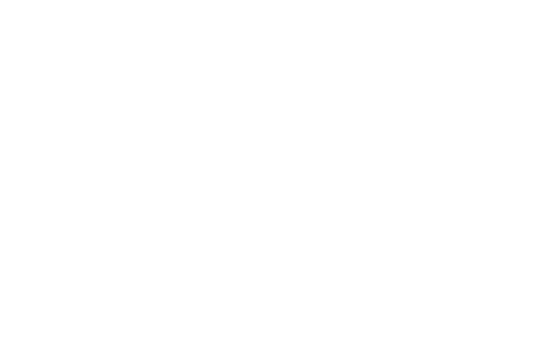

In [24]:
# The Canvas

fig = plt.figure() # creates an empty canvas

In [25]:
%matplotlib inline

## Subplots

In [26]:
x = [1,2,3,4]
y = [1,4,8,10]

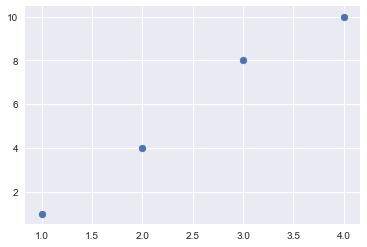

In [27]:
# Scatter plot
plt.scatter(x, y)

(array([ 1.,  0.,  0.,  1.,  0.,  0.,  1.,  0.,  0.,  1.]),
 array([ 1. ,  1.3,  1.6,  1.9,  2.2,  2.5,  2.8,  3.1,  3.4,  3.7,  4. ]),
 <a list of 10 Patch objects>)

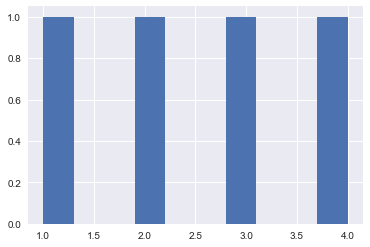

In [28]:
# Histogram
plt.hist(x)

{'boxes': [<matplotlib.lines.Line2D at 0x2092b5216d8>],
 'caps': [<matplotlib.lines.Line2D at 0x2092ca418d0>,
 'fliers': [<matplotlib.lines.Line2D at 0x2092c555ef0>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x2092ce92c50>],
 'whiskers': [<matplotlib.lines.Line2D at 0x2092cadc160>,
  <matplotlib.lines.Line2D at 0x2092cd984a8>]}

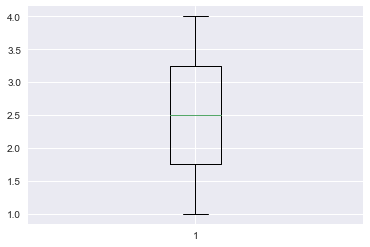

In [29]:
plt.boxplot(x)

#### * This link takes you to a gallery with a lot of different kinds of subplot types http://matplotlib.org/gallery.html *

## Customization

### * Labels*

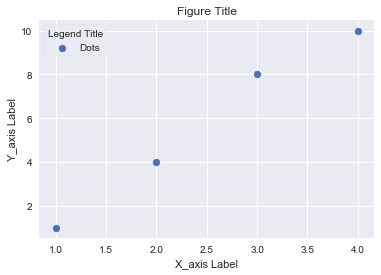

In [30]:
# I'm using a scatter plot as an example, but the label methods will work for any plot type
plt.scatter(x, y, label = "Dots")
plt.xlabel('X_axis Label')
plt.ylabel('Y_axis Label')
plt.title('Figure Title')
plt.legend(loc = 0, frameon= True, title = "Legend Title")


### * subplot parameters*

The parameters are pretty consistant, c is alway the color parameter, BUT unlike labels not all keyword arguments are valid for EVERY type of subplot. E.G. a pie chart doesn't have markers, so that keyword can't be used for pie plots

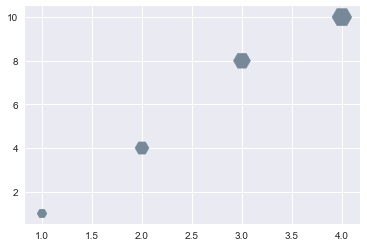

In [31]:
# subplot parameters
plt.scatter(x, y, marker = 'H', s=[100,200,300,400], c='lightslategray', label = "Dots")
# marker types https://matplotlib.org/api/markers_api.html
# s = size of marker
# c = color , r -> red, b -> blue, g -> green
#label = what the legend will label it as

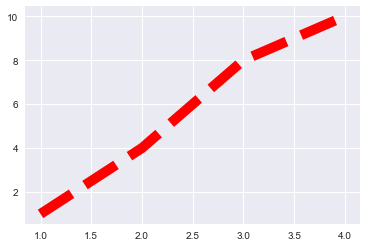

In [32]:
# another example 
plt.plot(x, y, linestyle='--', linewidth= 10, marker = None, c='R', label = "lines")

# note: the default plot is the lineplot

### * Axes *

Okay, this is where it get a little convoluted

<IPython.core.display.Javascript object>


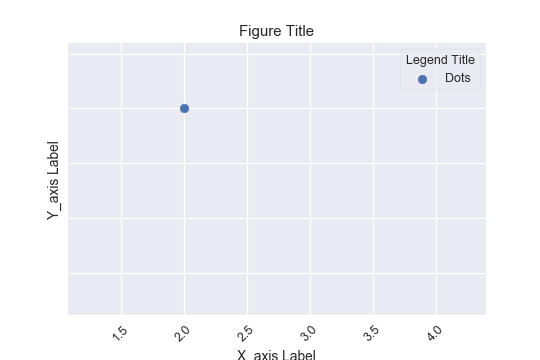

In [33]:
# scatter plot example
%matplotlib notebook 

plt.scatter(x, y, label = "Dots")
plt.xlabel('X_axis Label')
plt.ylabel('Y_axis Label')
plt.title('Figure Title')
plt.legend(loc = 0, frameon= True, title = "Legend Title")

In [34]:
# Axis object
ax = plt.gca() # gets current axis object
ax.get_children() # returns all of the information about current axis

#### * From the get_children method you can see that the axis object has quite a few components*
** Spines are the borders

In [35]:
# remove the border
for spine in ax.spines.values():
    spine.set_visible(False)

In [36]:
# change tick markes
plt.tick_params(top='off', bottom = 'on', left = 'off', right = 'off', labelleft = 'off', labelbottom = 'on')

In [37]:
# not just off or on
plt.xticks(rotation=45)

(array([ 0.5,  1. ,  1.5,  2. ,  2.5,  3. ,  3.5,  4. ,  4.5]),
 <a list of 9 Text xticklabel objects>)

#### *A little fancier data

In [38]:
%matplotlib inline
import numpy as np
x = np.linspace(0, 5, 10)
y = x**2

#### * LaTeX formatting is supported but you need to use raw strings *

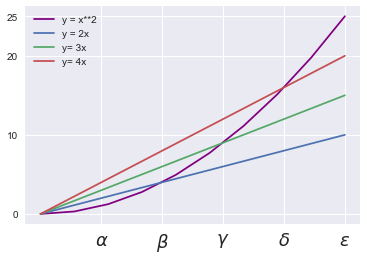

In [39]:
plt.plot(x, y, label='y = x**2', c = 'purple')
plt.plot(x, 2 * x, label= 'y = 2x')
plt.plot(x, 3 * x, label= 'y= 3x')
plt.plot(x, 4 * x, label= 'y= 4x')
plt.legend()

# change x and y labels with LaTex
ax = plt.gca()
ax.set_xticks([1, 2, 3, 4, 5])
ax.set_xticklabels([r'$\alpha$', r'$\beta$', r'$\gamma$', r'$\delta$', r'$\epsilon$'], fontsize=18)
yticks = [0, 10, 20, 25]
ax.set_yticks(yticks)

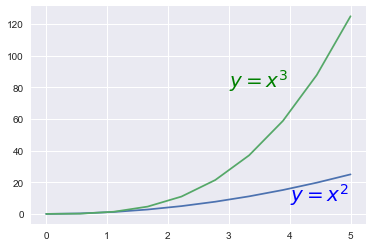

In [40]:
# Creates a figure and one subplot
fig, ax = plt.subplots()

# both lines share x axis
ax.plot(x, x**2, x, x**3)

# direct label lines with text
ax.text(4, 8, r"$y=x^2$", fontsize=20, color="blue")
ax.text(3, 80, r"$y=x^3$", fontsize=20, color="green")

<Container object of 3 artists>

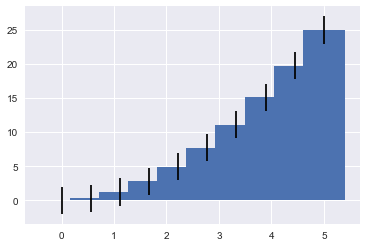

In [41]:
# errorbars
dy = 2
plt.bar(x,y)
plt.errorbar(x, y, yerr = dy, fmt = 'none', c= 'k') # this plots ONLY error bars

### * Multiple subplots *

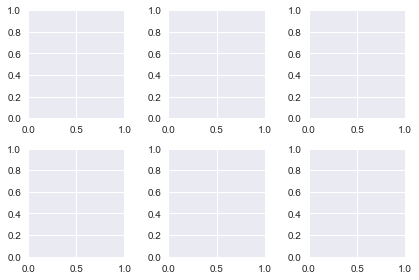

In [42]:
# figures in a gridF
fig, ax = plt.subplots(2, 3)
fig.tight_layout() # adjusts the spacing beween subplots so there is no overlap

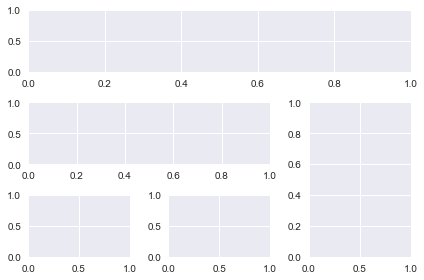

In [43]:
# create multiple subplots in one figure
fig = plt.figure()
sub1 = plt.subplot2grid((3,3), (0,0), colspan=3)
sub2 = plt.subplot2grid((3,3), (1,0), colspan=2)
sub3 = plt.subplot2grid((3,3), (1,2), rowspan=2)
sub4 = plt.subplot2grid((3,3), (2,0))
sub5 = plt.subplot2grid((3,3), (2,1))
fig.tight_layout()

#### Gridspec
This is so common there is a module that will help you

In [44]:
import matplotlib.gridspec as gridspec

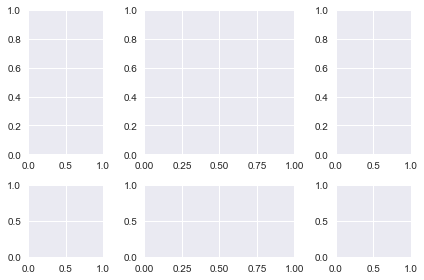

In [46]:
fig = plt.figure()
gs = gridspec.GridSpec(2, 3, height_ratios=[2,1], width_ratios=[1,2,1])

for g in gs:
    fig.add_subplot(g)
    
    
fig.tight_layout()   


#### Inset plots

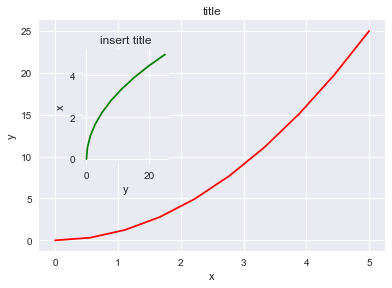

In [47]:
# make one figure
fig = plt.figure()

# create axis for two plots using fig.add_axes
# fig.add_axes([x_coordinate, y_coordinate, y_axis size, x_axis size])
rect1 = [0.1, 0.1, 0.8, 0.8] # [left,bottom,width,height] fraction of figure size
rect2 = [0.2, 0.4, 0.2, 0.4]
axes1 = fig.add_axes(rect1) # main axes
axes2 = fig.add_axes(rect2) # inset axes

# main figure
axes1.plot(x, y, color = 'r')
axes1.set_xlabel('x')
axes1.set_ylabel('y')
axes1.set_title('title')

# insert
axes2.plot(y, x, color = 'g')
axes2.set_xlabel('y')
axes2.set_ylabel('x')
axes2.set_title('insert title')

## Pandas Plotting Tools

In [48]:
# I'm going to import the iris dataset to show off how matplotlib works with Pandas
%matplotlib inline
import seaborn as sns
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002092FF69DA0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000002092F88B6D8>]], dtype=object)

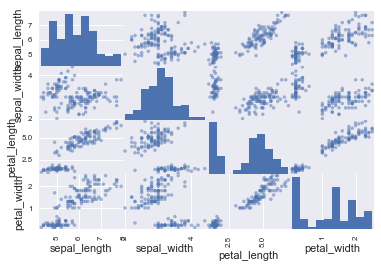

In [49]:
# scatter_matirx will plot every column against each other for a great look at trends
pd.plotting.scatter_matrix(iris)

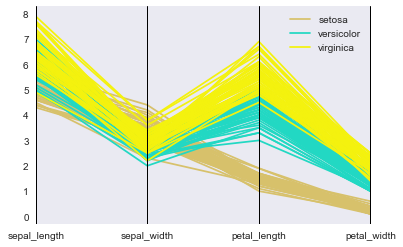

In [50]:
# parrallel coordinate plot, each row is represented as one line, with the 'species' column a different color
pd.plotting.parallel_coordinates(iris, 'species')

## Seaborn
Built on top of matplotlib so most mpl methods can be used
The documentation is great: http://seaborn.pydata.org , these examples are all in the documentation!

In [51]:
import seaborn as sns

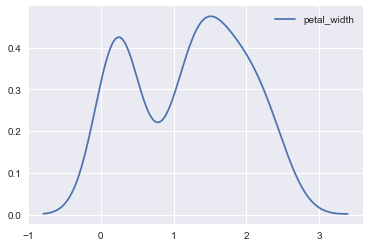

In [52]:
# kernal density estimate plot
sns.kdeplot(iris.petal_width)

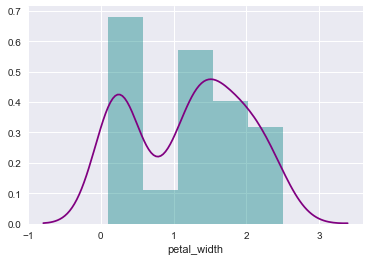

In [53]:
# distribution with KDE
sns.distplot(iris['petal_width'], hist_kws = {'color':'Teal'}, kde_kws = {'color':'Purple'})

#### Joint Plots
One figure that shows multiple types of plots

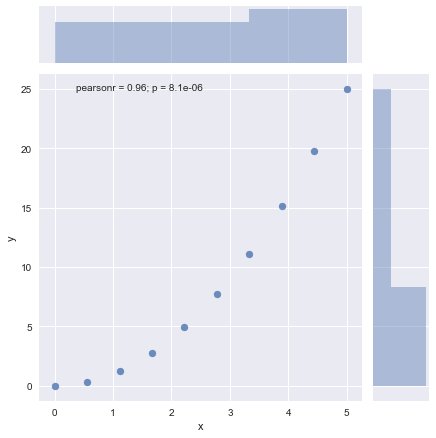

In [58]:
# Default: scatterplot and distributions
sns.jointplot(x, x**2, alpha = 0.8).set_axis_labels("x", "y")

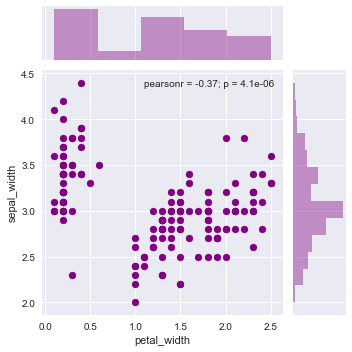

In [65]:
# works great with pandas dataframes
sns.jointplot("petal_width", "sepal_width", data=iris, size=5, ratio=4, color="purple")

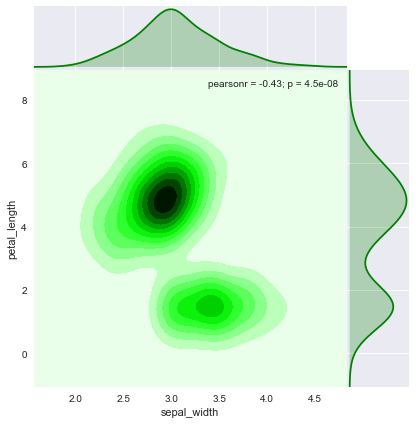

In [73]:
sns.jointplot("sepal_width", "petal_length", data=iris, kind="kde", space=0, color="g")

## Creating Publishable Figures

Thus far all figures have been created with the default backend Qt4Agg, but the backend can be changed for different output types

In [ ]:
# This command will give you a list of all possible backends you can use
print(mpl.rcsetup.all_backends)

Supported formats:
PNG, JPG, EPS, SVG, PGF and PDF

In [ ]:
# Generating SVG with the svg backend
#
# RESTART THE NOTEBOOK: the matplotlib backend can only be selected before pyplot is imported
import matplotlib
matplotlib.use('svg')
#import matplotlib.pyplot as plt
#import numpy as np
#from IPython.display import Image, SVG

In [ ]:
#switch to SVG figure rendering
%config InlineBackend.figure_format='svg'

In [ ]:
# switch to higher resolution figures
%config InlineBackend.figure_format='retina'

In [ ]:
fig, ax = plt.subplots()
t = numpy.linspace(0, 10, 100)
ax.plot(t, numpy.cos(t)*numpy.sin(t))


In [ ]:
plt.savefig("test.svg", dpi = 300)

In [ ]:
# Show the produced SVG file. 
SVG(filename="test.svg")

In [ ]:
# To go back to default Remember: you need to restart the notebook
import matplotlib
matplotlib.use('agg')

# This is just a taste of what is possible.  Go forth and Plot!